/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


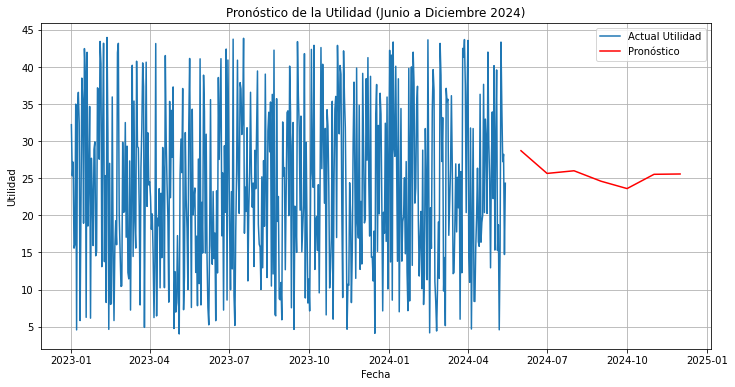

,Fecha,Utilidad Pronosticada
2024-05-15,2024-06-01,28.714839
2024-05-16,2024-07-01,25.653213
2024-05-17,2024-08-01,26.009765
2024-05-18,2024-09-01,24.603818
2024-05-19,2024-10-01,23.610163
2024-05-20,2024-11-01,25.533435
2024-05-21,2024-12-01,25.576145


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'predict_grupo_ortiz.csv'
data = pd.read_csv(file_path)

# Convertir la columna de fechas al formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%d/%m/%y')

# Establecer la fecha como índice para el modelado de series temporales
data.set_index('Fecha', inplace=True)

# Ajustar un modelo ARIMA (AutoRegressive Integrated Moving Average)
model = ARIMA(data['Utilidad'], order=(5, 1, 0))
model_fit = model.fit()

# Pronosticar la utilidad desde junio 2024 hasta diciembre 2024
forecast_steps = 7  # Número de meses de junio a diciembre
forecast = model_fit.forecast(steps=forecast_steps)

# Fechas para el periodo pronosticado
forecast_dates = pd.date_range(start='2024-06-01', periods=forecast_steps, freq='MS')

# Crear un DataFrame para almacenar los resultados del pronóstico
forecast_df = pd.DataFrame({'Fecha': forecast_dates, 'Utilidad Pronosticada': forecast})

# Graficar los valores actuales vs los pronosticados
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Utilidad'], label='Actual Utilidad')
plt.plot(forecast_df['Fecha'], forecast_df['Utilidad Pronosticada'], label='Pronóstico', color='red')
plt.title('Pronóstico de la Utilidad (Junio a Diciembre 2024)')
plt.xlabel('Fecha')
plt.ylabel('Utilidad')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los valores pronosticados
forecast_df


In [3]:
# Guardar el DataFrame de pronóstico en un archivo CSV
forecast_df.to_csv('resultado_predict.csv', index=False)



In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(data) * 0.8)  # Usar el 80% de los datos para entrenar
train, test = data.iloc[:train_size], data.iloc[train_size:]

# Ajustar el modelo ARIMA en el conjunto de entrenamiento
model = ARIMA(train['Utilidad'], order=(5, 1, 0))
model_fit = model.fit()

# Realizar predicciones sobre el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Calcular las métricas de error
mae = mean_absolute_error(test['Utilidad'], predictions)

# Imprimir los resultados
print(f'MAE (Mean Absolute Error): {mae:.2f}')


MAE (Mean Absolute Error): 10.61


/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/laptop/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [7]:
# Calcular la media de los valores reales en el conjunto de prueba
mean_real_value = test['Utilidad'].mean()

# Calcular el porcentaje de precisión
precision = (1 - mae / mean_real_value) * 100

# Imprimir el porcentaje de precisión
print(f'El porcentaje de precisión del modelo es: {precision:.2f}%')


El porcentaje de precisión del modelo es: 54.61%
